In [1]:
# import all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# load dataset
df = pd.read_csv('3. Police Data.csv')
df.sample(5)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
35547,6/18/2009,8:05,NaN,M,1963.0,46.0,White,Special Detail/Directed Patrol,Other,False,NaN,Citation,False,30+ Min,False
62393,8/2/2012,9:01,NaN,M,1977.0,35.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
19259,8/9/2007,1:23,NaN,M,1984.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
43301,6/23/2010,11:15,NaN,M,1992.0,18.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
46176,11/19/2010,0:01,NaN,M,1988.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


By looking at five random instances in the dataset, it was shown that some of the attributes values were repetitive, which means that they are probably a categorical attribute. 

#### Let's find the shape of the dataset i.e the numbers of rows and columns in the dataset.

In [3]:
df.shape

(65535, 15)

#### The above result shows that:
1. The number of instances = 65535
2. The number of attributes = 15

#### We can take a look at all the features/attributes of the dataset by columns method

In [4]:
df.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

#### Let's find out the number of missing values in each attribute.

In [5]:
df.isna().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

The result shows that out of 15 attributes we have in the dataset, only 4 of them has no missing values, most of them have missing values in the range of 4060 to 4307 while one attribute (search_type) has almost all its values as missing values and one attribute (country_name) has no value at all. 

#### Let's get a quick description of the data via the info() method which is useful for the task, in particular this method will return the total number of rows, and each attribute's type and number of non-null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

#### From the above method, I noticed the following:
#### 1. stop_date was recorded as an object datatype instead of datetime.
#### 2. Nothing was recorded in the country_name attribute as it returned 0 non-null value.

### Let's start fixing the problem from the Datatype

In [7]:
df.stop_date = pd.to_datetime(df['stop_date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           65535 non-null  datetime64[ns]
 1   stop_time           65535 non-null  object        
 2   country_name        0 non-null      float64       
 3   driver_gender       61474 non-null  object        
 4   driver_age_raw      61481 non-null  float64       
 5   driver_age          61228 non-null  float64       
 6   driver_race         61475 non-null  object        
 7   violation_raw       61475 non-null  object        
 8   violation           61475 non-null  object        
 9   search_conducted    65535 non-null  bool          
 10  search_type         2479 non-null   object        
 11  stop_outcome        61475 non-null  object        
 12  is_arrested         61475 non-null  object        
 13  stop_duration       61475 non-null  object    

### Since there was no value in the country_name attribute, I think dropping it won't be an issue so, let's drop the column.

In [9]:
df.drop('country_name', axis = 1, inplace = True)

### So, let's now see if the changes have been reflected on our dataset by calling df.info() method once again.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           65535 non-null  datetime64[ns]
 1   stop_time           65535 non-null  object        
 2   driver_gender       61474 non-null  object        
 3   driver_age_raw      61481 non-null  float64       
 4   driver_age          61228 non-null  float64       
 5   driver_race         61475 non-null  object        
 6   violation_raw       61475 non-null  object        
 7   violation           61475 non-null  object        
 8   search_conducted    65535 non-null  bool          
 9   search_type         2479 non-null   object        
 10  stop_outcome        61475 non-null  object        
 11  is_arrested         61475 non-null  object        
 12  stop_duration       61475 non-null  object        
 13  drugs_related_stop  65535 non-null  bool      

#### Wonderfull!!! We've made the changes.

### As I was said earlier that some values were repeated in some attributes so I want to find out what categories exit and how many districts belong to each category by using the value_counts() method and their visualizations.

In [11]:
df.drugs_related_stop.value_counts()

False    65017
True       518
Name: drugs_related_stop, dtype: int64

In [12]:
def piePlot(count, x, explode):
    plt.rcParams["figure.figsize"] = [7.50, 5.50]
    total_count = count.sum()
    labels = x.index
    return plt.pie(count, explode = explode, labels = labels, autopct = lambda i : '{:.0f}'.format(i * total_count / 100),
                  shadow = False, startangle = 90)


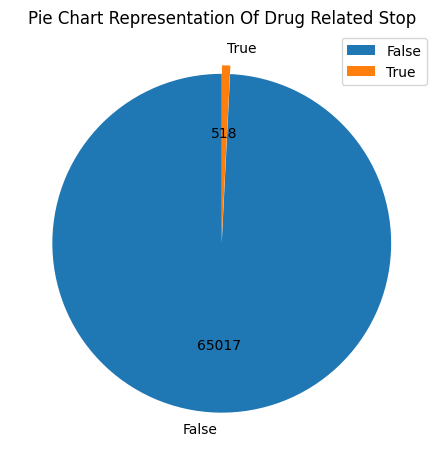

In [92]:
x = df.drugs_related_stop.value_counts()
count = x.values
explode = [0,0.05]
piePlot(count, x , explode);
plt.title('pie chart representation of drug related stop'.title())
plt.legend();

In [14]:
df["driver_race"].value_counts()

White       45747
Black        8267
Hispanic     5611
Asian        1639
Other         211
Name: driver_race, dtype: int64

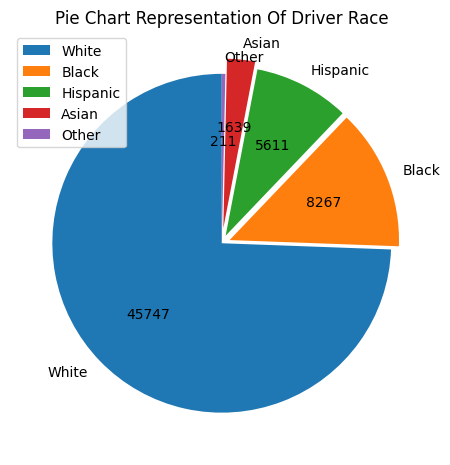

In [103]:
x = df.driver_race.value_counts()
count = x.values
explode = [0,0.05,0.05,0.09,0]
piePlot(count, x , explode);
plt.title('pie chart representation of driver race'.title())
plt.legend();

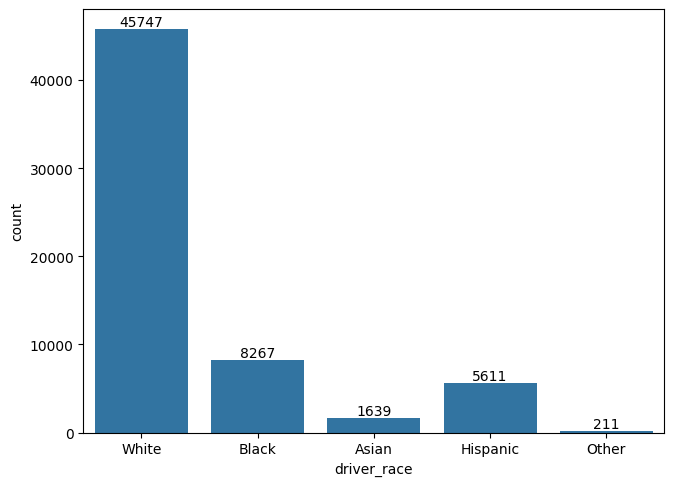

In [106]:
color = sb.color_palette()[0]
ax = sb.countplot(x = "driver_race", color = color, data = df);
for label in ax.containers:
    ax.bar_label(label)

In [17]:
df["violation"].value_counts()

Speeding               37204
Moving violation       11926
Equipment               6516
Other                   3583
Registration/plates     2243
Seat belt                  3
Name: violation, dtype: int64

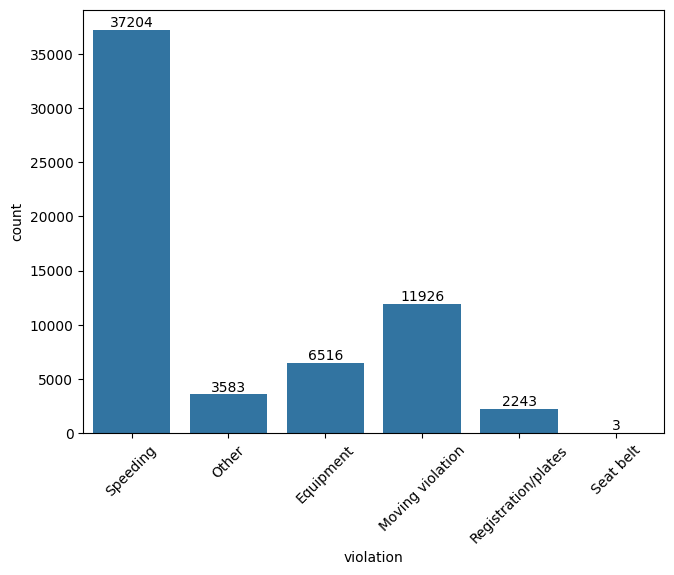

In [91]:
color = sb.color_palette()[0]
ax = sb.countplot(x = "violation", color = color, data = df);
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation = 45);

In [20]:
df["violation_raw"].value_counts()

Speeding                            37204
Other Traffic Violation             11926
Equipment/Inspection Violation       6516
Special Detail/Directed Patrol       2383
Registration Violation               2243
Call for Service                      793
Violation of City/Town Ordinance      170
Motorist Assist/Courtesy              138
APB                                    51
Suspicious Person                      38
Warrant                                10
Seatbelt Violation                      3
Name: violation_raw, dtype: int64

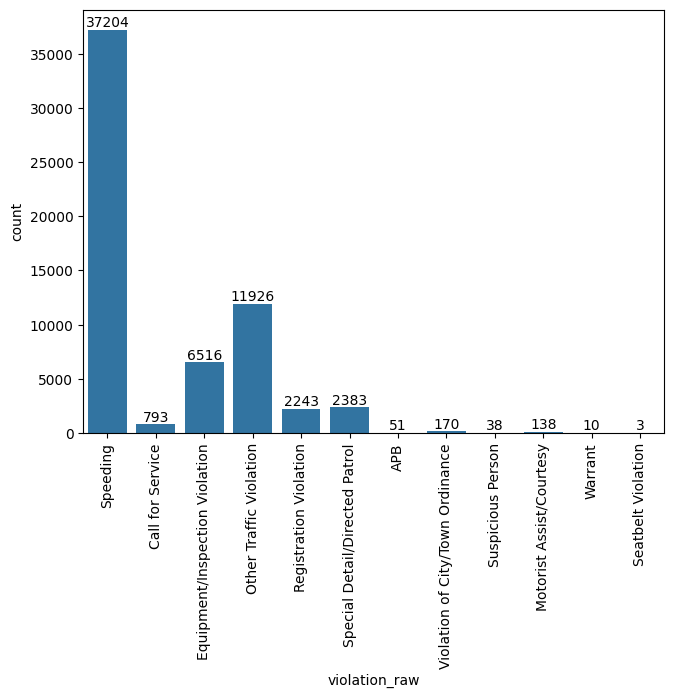

In [90]:
color = sb.color_palette()[0]
ax = sb.countplot(x = "violation_raw", color = color, data = df);
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation = 90);

In [21]:
df["stop_outcome"].value_counts()

Citation            56564
Arrest Driver        2009
Warning              1889
N/D                   423
No Action             339
Arrest Passenger      251
Name: stop_outcome, dtype: int64

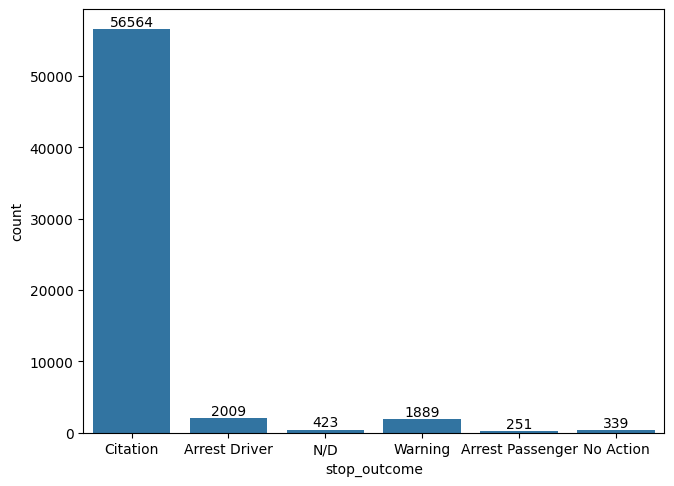

In [82]:
color = sb.color_palette()[0]
ax = sb.countplot(x = "stop_outcome", color = color, data = df);
for label in ax.containers:
    ax.bar_label(label)

In [23]:
df["stop_duration"].value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

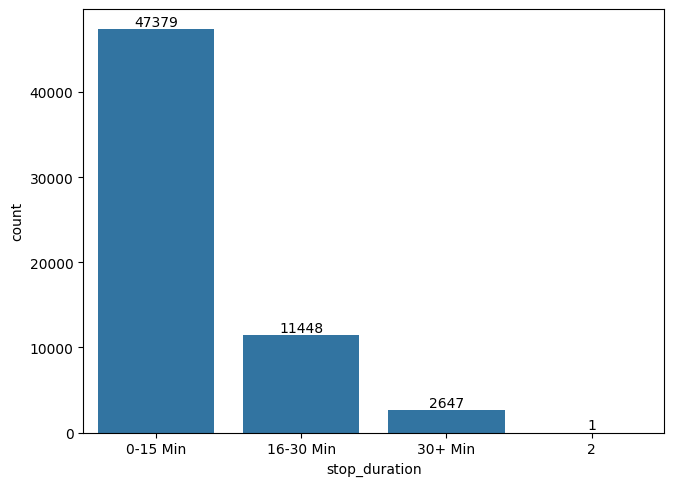

In [83]:
color = sb.color_palette()[0]
ax = sb.countplot(x = "stop_duration", color = color, data = df);
for label in ax.containers:
    ax.bar_label(label)

In [25]:
df[df['drugs_related_stop'] == True]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
40,2005-10-01,0:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True
41,2005-10-01,0:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,30+ Min,True
118,2005-10-04,1:20,M,1956.0,49.0,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,True
139,2005-10-05,0:20,M,1980.0,25.0,Black,Equipment/Inspection Violation,Equipment,True,"Probable Cause,Reasonable Suspicion",Arrest Driver,True,16-30 Min,True
219,2005-10-07,23:30,M,1986.0,19.0,White,Suspicious Person,Other,True,Probable Cause,Arrest Passenger,True,16-30 Min,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64858,2012-11-06,22:45,M,1988.0,24.0,Black,Speeding,Speeding,True,Reasonable Suspicion,Citation,False,16-30 Min,True
65033,2012-11-16,15:43,M,1985.0,27.0,White,Speeding,Speeding,True,Probable Cause,Citation,False,16-30 Min,True
65219,2012-11-23,20:03,M,1979.0,33.0,Black,Equipment/Inspection Violation,Equipment,True,"Incident to Arrest,Probable Cause",Arrest Driver,True,30+ Min,True
65408,2012-11-30,22:37,F,1986.0,26.0,Hispanic,Speeding,Speeding,True,Reasonable Suspicion,Citation,False,30+ Min,True


In [26]:
df[df['drugs_related_stop'] == True].driver_race.value_counts()

White       321
Black       128
Hispanic     62
Asian         7
Name: driver_race, dtype: int64

In [70]:
def addLabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i],y[i], horizontalalignment = 'center', fontsize = 10, fontstyle = 'oblique')

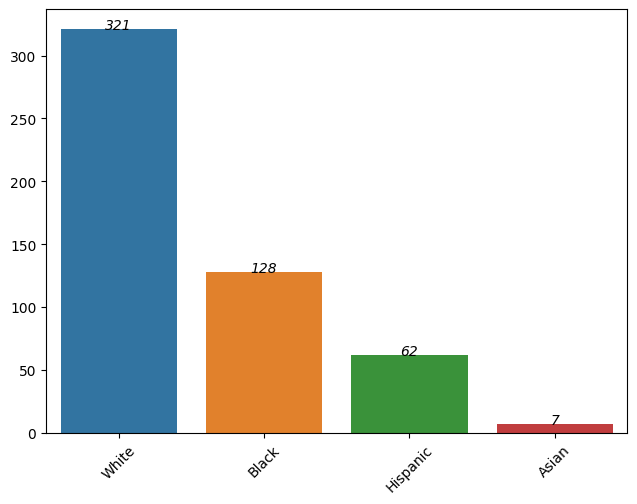

In [71]:
x_axis = df[df['drugs_related_stop'] == True].driver_race.value_counts().index
y_axis = df[df['drugs_related_stop'] == True].driver_race.value_counts().values
g = sb.barplot(x = x_axis, y = y_axis)
g.set_xticklabels(labels = x_axis, rotation = 45);
addLabels(x_axis, y_axis);

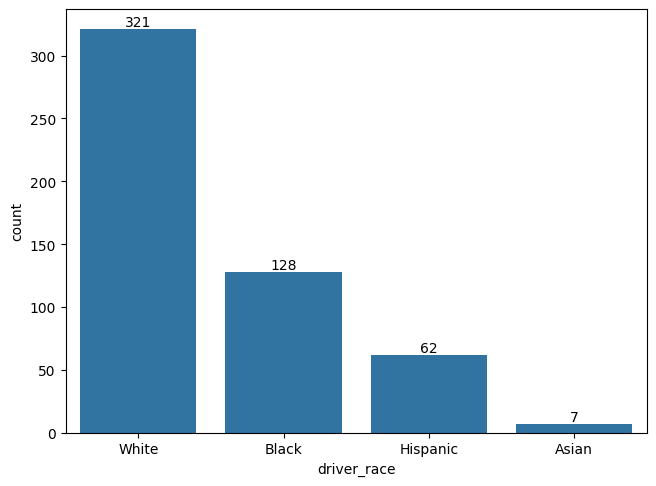

In [84]:
data = df[df['drugs_related_stop'] == True]
color = sb.color_palette()[0]
ax = sb.countplot(x = "driver_race", color = color, data = data);
for label in ax.containers:
    ax.bar_label(label)

In [28]:
df[df['drugs_related_stop'] == False].driver_race.value_counts()

White       45426
Black        8139
Hispanic     5549
Asian        1632
Other         211
Name: driver_race, dtype: int64

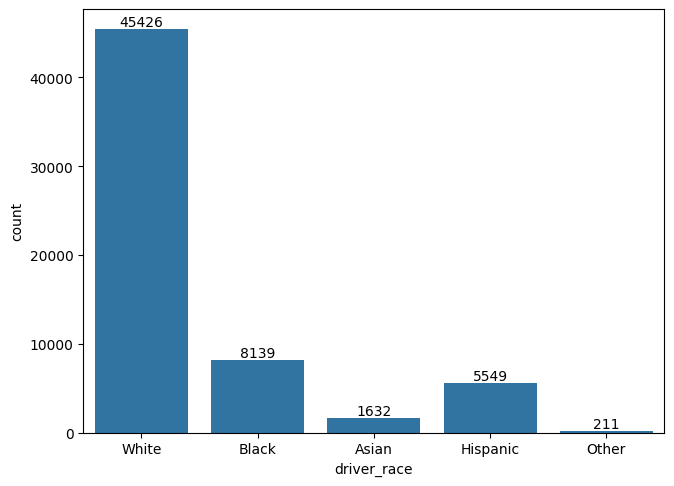

In [85]:
data = df[df['drugs_related_stop'] == False]
color = sb.color_palette()[0]
ax = sb.countplot(x = "driver_race", color = color, data = data);
for label in ax.containers:
    ax.bar_label(label)

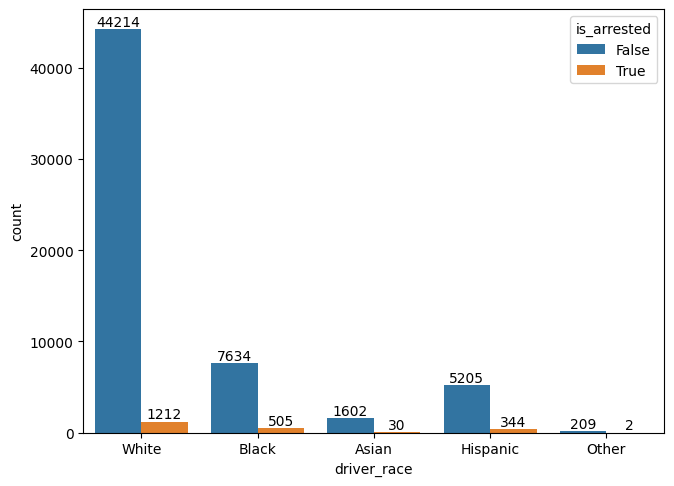

In [79]:
data = df[df['drugs_related_stop'] == False]
ax = sb.countplot(x = "driver_race", hue = 'is_arrested', data = data);
for label in ax.containers:
    ax.bar_label(label)

In [30]:
df[df['drugs_related_stop'] == False].search_type.value_counts()

Incident to Arrest                                          987
Probable Cause                                              291
Inventory                                                   164
Reasonable Suspicion                                        125
Protective Frisk                                            114
Incident to Arrest,Inventory                                100
Incident to Arrest,Probable Cause                            43
Incident to Arrest,Protective Frisk                          30
Probable Cause,Reasonable Suspicion                          17
Incident to Arrest,Inventory,Probable Cause                  14
Probable Cause,Protective Frisk                              14
Inventory,Protective Frisk                                   11
Inventory,Probable Cause                                     10
Incident to Arrest,Inventory,Protective Frisk                10
Protective Frisk,Reasonable Suspicion                         8
Incident to Arrest,Probable Cause,Protec

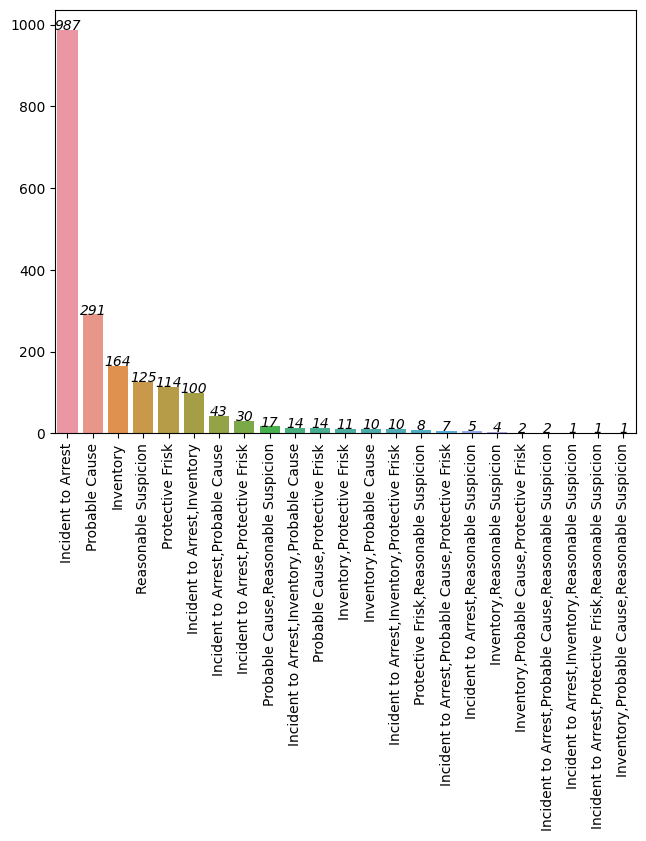

In [72]:
x_axis = df[df['drugs_related_stop'] == False].search_type.value_counts().index
y_axis = df[df['drugs_related_stop'] == False].search_type.value_counts().values
g = sb.barplot(x = x_axis, y = y_axis)
g.set_xticklabels(labels = x_axis, rotation = 90);
addLabels(x_axis, y_axis);

In [31]:
df[df['drugs_related_stop'] == False].search_conducted.value_counts()

False    63056
True      1961
Name: search_conducted, dtype: int64

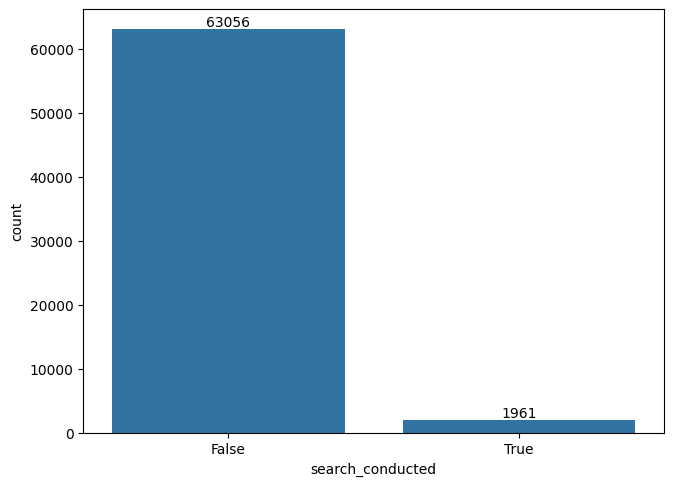

In [86]:
data = df[df['drugs_related_stop'] == False]
color = sb.color_palette()[0]
ax = sb.countplot(x = "search_conducted", color = color, data = data);
for label in ax.containers:
    ax.bar_label(label)

In [33]:
df[df['drugs_related_stop'] == True].driver_gender.value_counts()

M    462
F     56
Name: driver_gender, dtype: int64

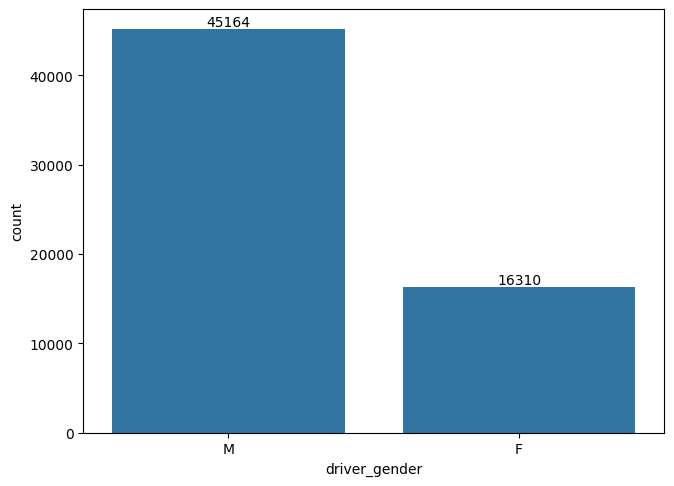

In [87]:
data = df[df['drugs_related_stop'] == True]
color = sb.color_palette()[0]
ax = sb.countplot(x = "driver_gender", color = color, data = df);
for label in ax.containers:
    ax.bar_label(label)

In [35]:
df[df['drugs_related_stop'] == True].search_conducted.value_counts()

True    518
Name: search_conducted, dtype: int64

The result here shows that search was conducted for all the drug related stop.

In [36]:
df[df['drugs_related_stop'] == True].search_type.value_counts()

Probable Cause                                            288
Incident to Arrest                                         87
Incident to Arrest,Probable Cause                          36
Reasonable Suspicion                                       24
Probable Cause,Reasonable Suspicion                        21
Protective Frisk                                           12
Incident to Arrest,Inventory,Probable Cause                12
Probable Cause,Protective Frisk                             9
Inventory                                                   9
Inventory,Probable Cause                                    4
Incident to Arrest,Inventory                                4
Incident to Arrest,Reasonable Suspicion                     3
Incident to Arrest,Probable Cause,Protective Frisk          3
Protective Frisk,Reasonable Suspicion                       2
Incident to Arrest,Inventory,Protective Frisk               1
Incident to Arrest,Inventory,Reasonable Suspicion           1
Incident

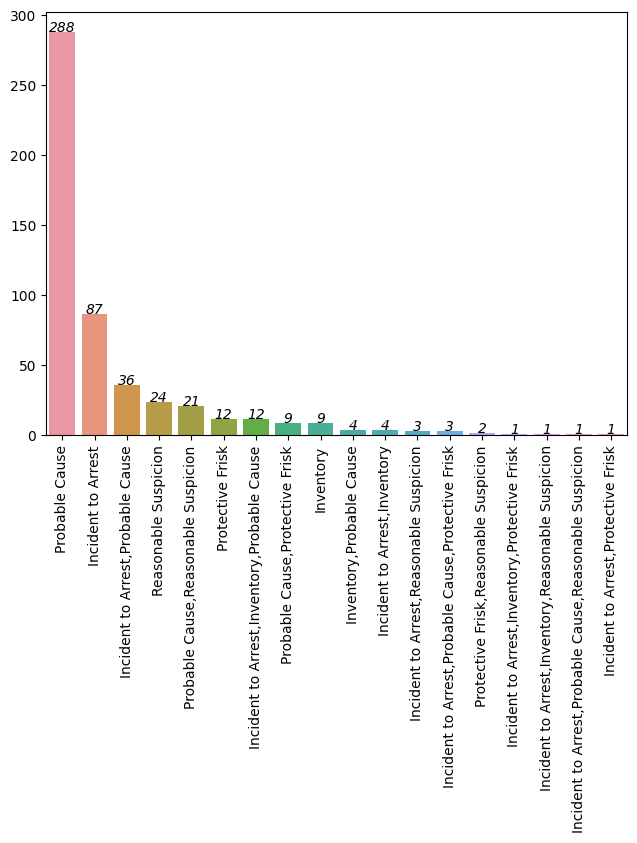

In [73]:
x_axis = df[df['drugs_related_stop'] == True].search_type.value_counts().index
y_axis = df[df['drugs_related_stop'] == True].search_type.value_counts().values
g = sb.barplot(x = x_axis, y = y_axis)
g.set_xticklabels(labels = x_axis, rotation = 90);
addLabels(x_axis, y_axis);

In [37]:
df[df['drugs_related_stop'] == False].driver_gender.value_counts()

M    44702
F    16254
Name: driver_gender, dtype: int64

In [38]:
df[df['drugs_related_stop'] == True].is_arrested.value_counts()

False    351
True     167
Name: is_arrested, dtype: int64

The above result indicates that out of 518 drug related stop, 167 leads to arrested.

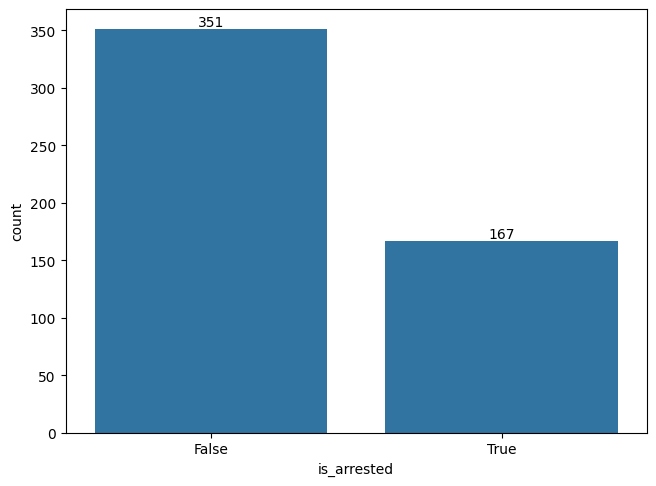

In [88]:
data = df[df['drugs_related_stop'] == True]
color = sb.color_palette()[0]
ax = sb.countplot(x = "is_arrested", color = color, data = data);
for label in ax.containers:
    ax.bar_label(label)

In [40]:
df.stop_time = pd.to_datetime(df.stop_time, format = '%H:%M').dt.time

In [41]:
df.sample(10)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
56436,2012-02-07,07:16:00,F,1989.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
16183,2007-04-15,10:35:00,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
32466,2009-02-12,09:02:00,F,1980.0,29.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
43263,2010-06-21,17:05:00,M,1988.0,22.0,White,Registration Violation,Registration/plates,False,NaN,Arrest Passenger,True,16-30 Min,False
27991,2008-08-08,22:44:00,M,1985.0,23.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
43868,2010-07-21,07:41:00,M,1967.0,43.0,Black,Special Detail/Directed Patrol,Other,False,NaN,Citation,False,0-15 Min,False
23709,2008-02-09,00:59:00,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52256,2011-09-05,14:05:00,F,1983.0,28.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
55851,2012-01-22,19:49:00,M,1979.0,33.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
53306,2011-10-20,01:03:00,M,1986.0,25.0,Black,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Passenger,True,0-15 Min,False


In [42]:
df.driver_gender.value_counts()

M    45164
F    16310
Name: driver_gender, dtype: int64

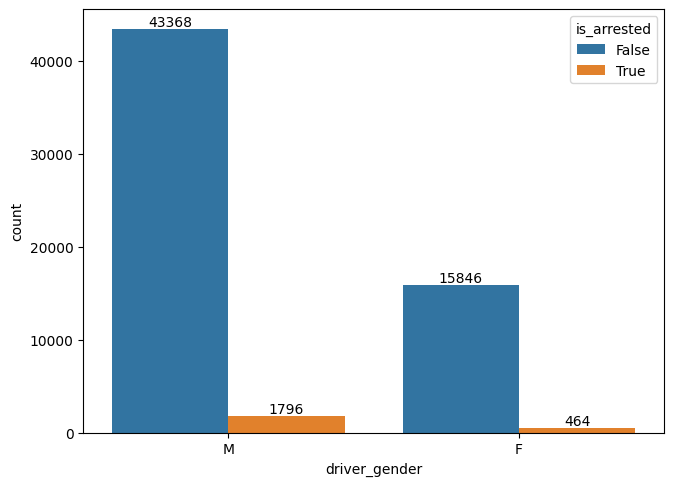

In [80]:
ax = sb.countplot(x = "driver_gender",hue = 'is_arrested', data = df);
for label in ax.containers:
    ax.bar_label(label)

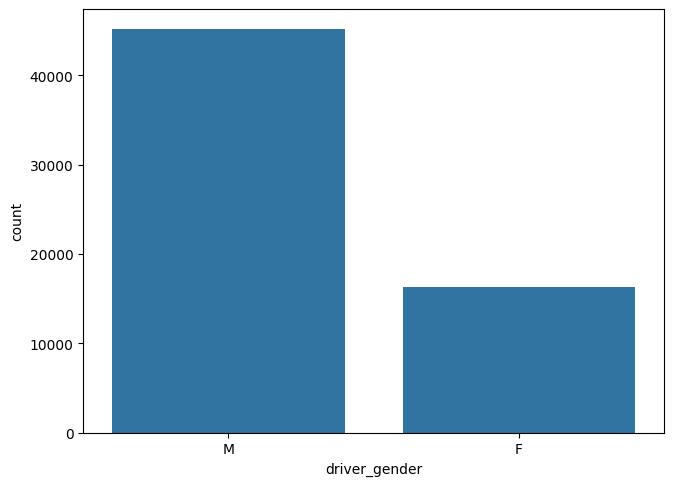

In [43]:
color = sb.color_palette()[0]
sb.countplot(x = "driver_gender", color = color, data = df);

Let's look at the other fields. The describe() method will show us a summary of the numerical attributes in the dataset which are only two: driver_age_raw and driver_age. 

In [44]:
df.describe()

,driver_age_raw,driver_age
count,61481.000000,61228.000000
mean,1967.791106,34.148984
std,121.050106,12.760710
min,0.000000,15.000000
25%,1965.000000,23.000000
50%,1978.000000,31.000000
75%,1985.000000,43.000000
max,8801.000000,88.000000


The count, mean, min and max rows are self-explanatory. Note that the null values are ignored (so, for example, count of driver_age is 61228, not 65535 which is total number of rows in the dataset). The std row shows the standard deviation, which measures how dispersed the values are. The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the districts have a driver_age lower than 23, while 50% are lower than 31 and 75% are lower than 43. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

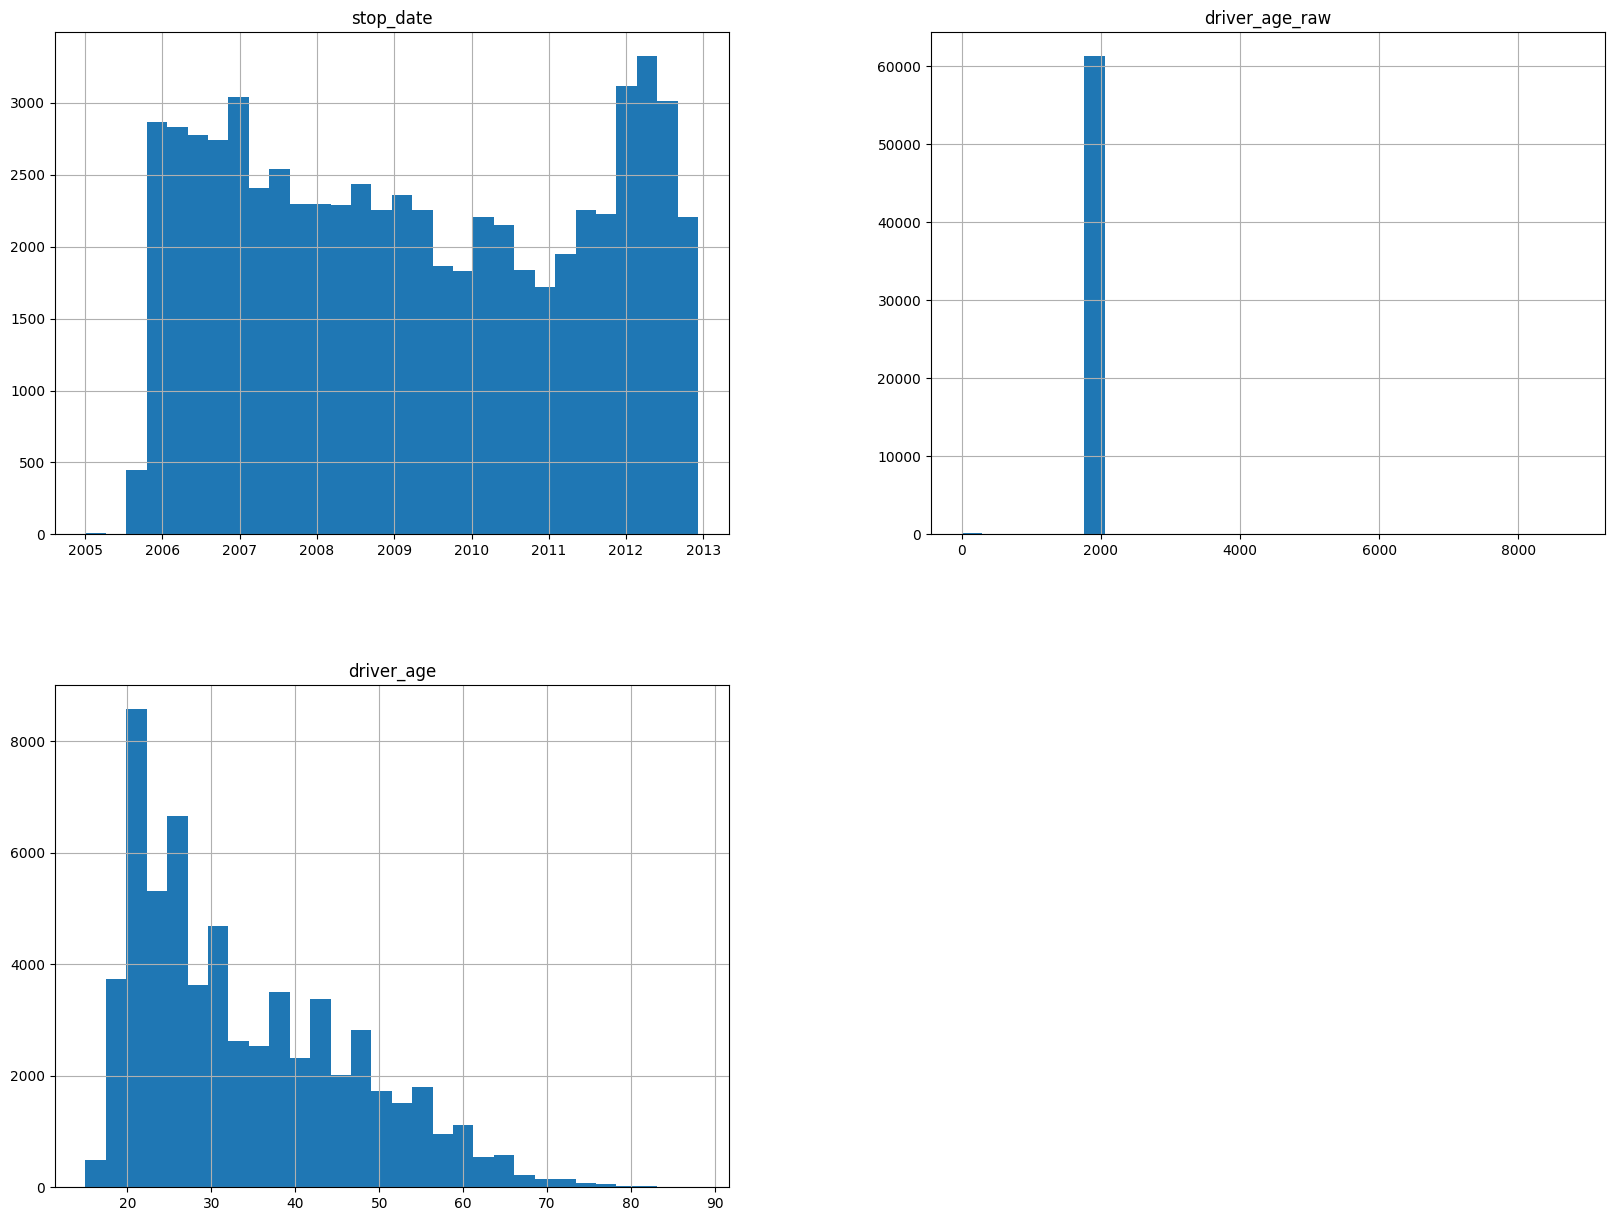

In [45]:
%matplotlib inline
df.hist(bins = 30, figsize = (20,15));